        date  births
0 1959-01-01      35
1 1959-01-02      32
2 1959-01-03      30
3 1959-01-04      31
4 1959-01-05      44
                 date  births
date                         
1959-01-01 1959-01-01      35
1959-01-02 1959-01-02      32
1959-01-03 1959-01-03      30
1959-01-04 1959-01-04      31
1959-01-05 1959-01-05      44
AxesSubplot(0.125,0.125;0.775x0.755)


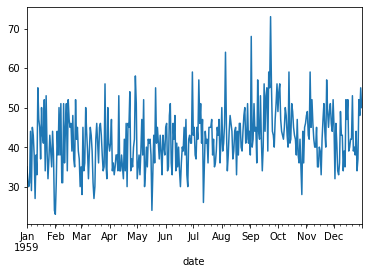

In [17]:
import pandas as pd
from matplotlib import pyplot as plt
dataframe = pd.read_csv('daily-total-female-births-CA.csv', header=0)

df2 = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0])
print(df2.head())
df2.index = df2['date']
print(df2.head())

print(df2['births'].plot())


In [12]:
df3 = df2[(df2['date'] > '1959-01-01') & (df2['date'] < '1959-01-10')]
df3.index = df3['date']

In [13]:
df3.head()

,date,births
date,,
1959-01-02,1959-01-02,32
1959-01-03,1959-01-03,30
1959-01-04,1959-01-04,31
1959-01-05,1959-01-05,44
1959-01-06,1959-01-06,29


<AxesSubplot:xlabel='date'>

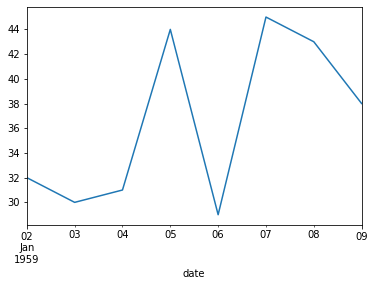

In [14]:
df3['births'].plot() 

In [19]:
import seaborn as sns

In [20]:
df2 = pd.read_csv('daily-total-female-births-CA.csv', header=0, parse_dates=[0])

<AxesSubplot:ylabel='births'>

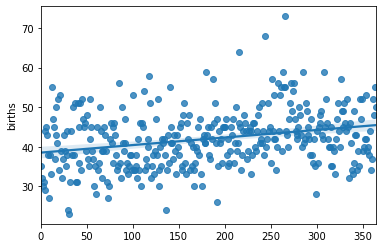

In [22]:
sns.regplot(x= df2.index.values, y=df2['births'])

In [40]:
df2 = pd.read_csv('us-airlines-monthly-aircraft-miles-flown.csv', header=0, parse_dates=[0])

In [36]:
df2.head()

,Month,MilesMM
0,1963-01-01,6827
1,1963-02-01,6178
2,1963-03-01,7084
3,1963-04-01,8162
4,1963-05-01,8462


In [37]:
df2.index = df2['Month']

<AxesSubplot:xlabel='Month'>

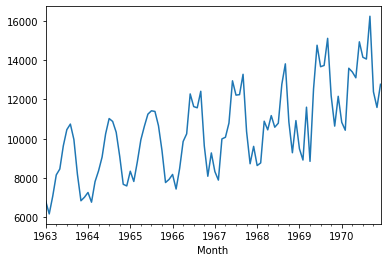

In [38]:
df2['MilesMM'].plot()

<AxesSubplot:ylabel='MilesMM'>

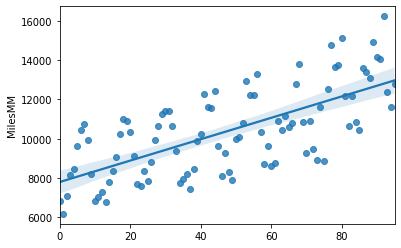

In [42]:
sns.regplot(x= df2.index.values, y= df2['MilesMM'])

In [43]:
df2['years'] = df2['Month'].dt.year

In [44]:
df2.head()

,Month,MilesMM,years
0,1963-01-01,6827,1963
1,1963-02-01,6178,1963
2,1963-03-01,7084,1963
3,1963-04-01,8162,1963
4,1963-05-01,8462,1963


In [45]:
df2.groupby('years')['MilesMM'].mean()

years
1963     8300.250000
1964     8849.333333
1965     9619.250000
1966     9929.500000
1967    10542.916667
1968    10747.916667
1969    11972.000000
1970    13124.750000
Name: MilesMM, dtype: float64

<AxesSubplot:xlabel='years'>

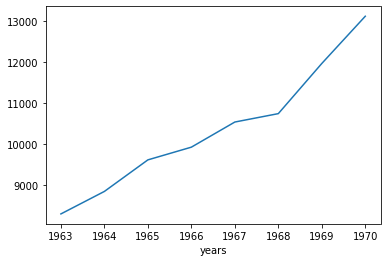

In [47]:
df2.groupby('years')['MilesMM'].mean().plot()

In [49]:
df2['lag1'] = df2['MilesMM'].shift(1)

In [50]:
df2.head()

,Month,MilesMM,years,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


<AxesSubplot:xlabel='lag1', ylabel='MilesMM'>

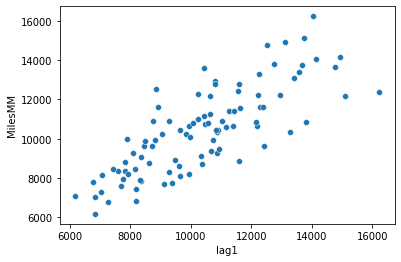

In [51]:
sns.scatterplot(x= df2['lag1'], y= df2['MilesMM'])

In [52]:
df2.describe()

,MilesMM,years,lag1
count,96.000000,96.000000,95.000000
mean,10385.739583,1966.500000,10360.621053
std,2202.500551,2.303316,2200.318271
min,6178.000000,1963.000000,6178.000000
25%,8600.250000,1964.750000,8561.500000
50%,10401.000000,1966.500000,10366.000000
75%,11768.000000,1968.250000,11622.000000
max,16234.000000,1970.000000,16234.000000


In [53]:
df2.head()

,Month,MilesMM,years,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


In [55]:
from pandas.plotting import lag_plot

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

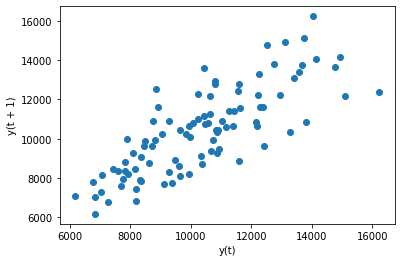

In [56]:
lag_plot(df2['MilesMM'])

In [58]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

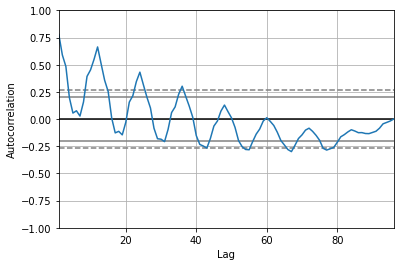

In [60]:
autocorrelation_plot(df2['MilesMM'])

In [61]:
df2.head()

,Month,MilesMM,years,lag1
0,1963-01-01,6827,1963,NaN
1,1963-02-01,6178,1963,6827.0
2,1963-03-01,7084,1963,6178.0
3,1963-04-01,8162,1963,7084.0
4,1963-05-01,8462,1963,8162.0


In [62]:
feature = df2.copy()

In [67]:
feature['rollmean'] = df2['MilesMM'].rolling(window = 2).mean()

In [69]:
feature['expand_max'] = df2['MilesMM'].expanding().max()

In [70]:
feature.head()

,Month,MilesMM,years,lag1,rollmean,expand_max
0,1963-01-01,6827,1963,NaN,NaN,6827.0
1,1963-02-01,6178,1963,6827.0,6502.5,6827.0
2,1963-03-01,7084,1963,6178.0,6631.0,7084.0
3,1963-04-01,8162,1963,7084.0,7623.0,8162.0
4,1963-05-01,8462,1963,8162.0,8312.0,8462.0
